In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Simulate 5 years of operational loss data
years = np.arange(2019, 2024)
n_events_per_year = np.random.poisson(lam=15, size=5)  # avg 15 loss events per year

loss_data = []
event_types = ['System Failure', 'Fraud', 'Human Error', 'Cyber Attack', 'Process Failure']

for y, n in zip(years, n_events_per_year):
    for _ in range(n):
        loss = np.random.lognormal(mean=12, sigma=1)  # severity (₹)
        loss_data.append({
            'Year': y,
            'Event_Type': np.random.choice(event_types),
            'Loss_Amount': loss
        })

df_opr = pd.DataFrame(loss_data)
df_opr['Loss_Amount'] = df_opr['Loss_Amount'] / 1e6  # convert to millions
df_opr.head()


,Year,Event_Type,Loss_Amount
0,2019,Cyber Attack,0.207308
1,2019,System Failure,0.024022
2,2019,Fraud,0.368223
3,2019,Cyber Attack,0.035459
4,2019,Cyber Attack,0.203227


In [2]:
# Loss frequency per year
freq = df_opr.groupby('Year').size()

# Loss severity per year
severity = df_opr.groupby('Year')['Loss_Amount'].mean()

print("Loss Frequency per Year:\n", freq)
print("\nAverage Loss Severity per Year (₹ million):\n", severity.round(2))


Loss Frequency per Year:
 Year
2019    18
2020    10
2021    16
2022    19
2023    11
dtype: int64

Average Loss Severity per Year (₹ million):
 Year
2019    0.15
2020    0.28
2021    0.22
2022    0.13
2023    0.35
Name: Loss_Amount, dtype: float64


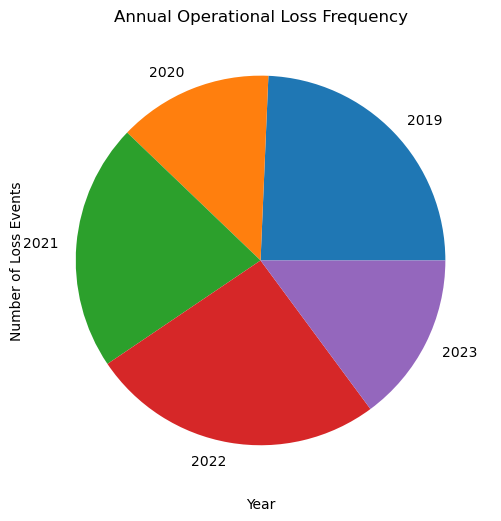

In [16]:
plt.figure(figsize=(9,6))
freq.plot(kind='pie', color='teal')
plt.title('Annual Operational Loss Frequency')
plt.ylabel('Number of Loss Events')
plt.xlabel('Year')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


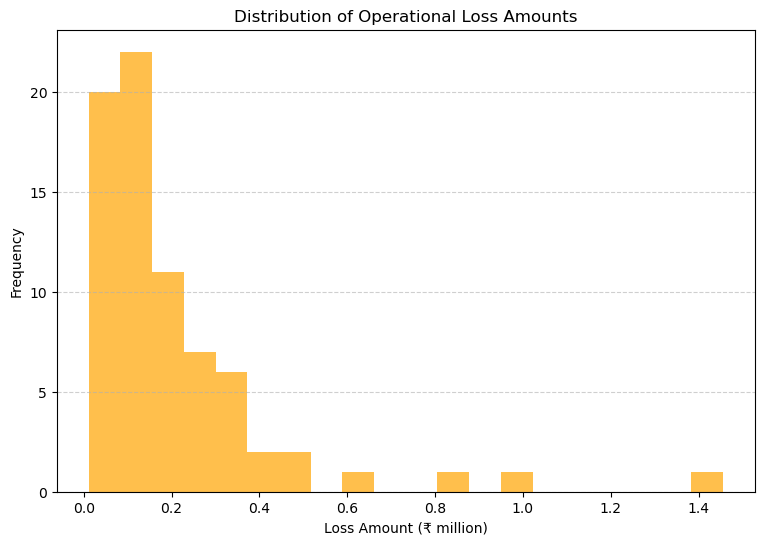

In [17]:
plt.figure(figsize=(9,6))
plt.hist(df_opr['Loss_Amount'], bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Operational Loss Amounts')
plt.xlabel('Loss Amount (₹ million)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [13]:
lambda_freq = freq.mean()                     # expected frequency
mean_loss = df_opr['Loss_Amount'].mean()      # average severity
expected_annual_loss = lambda_freq * mean_loss

print(f"Expected Annual Operational Loss: ₹{expected_annual_loss:.2f} million")


Expected Annual Operational Loss: ₹3.07 million


In [14]:
stress_freq = lambda_freq * 1.4
stress_mean_loss = mean_loss * 1.6
stress_eal = stress_freq * stress_mean_loss

print(f"Stressed Annual Expected Loss: ₹{stress_eal:.2f} million")
print(f"Increase vs Base: {((stress_eal / expected_annual_loss) - 1) * 100:.1f}%")


Stressed Annual Expected Loss: ₹6.87 million
Increase vs Base: 124.0%


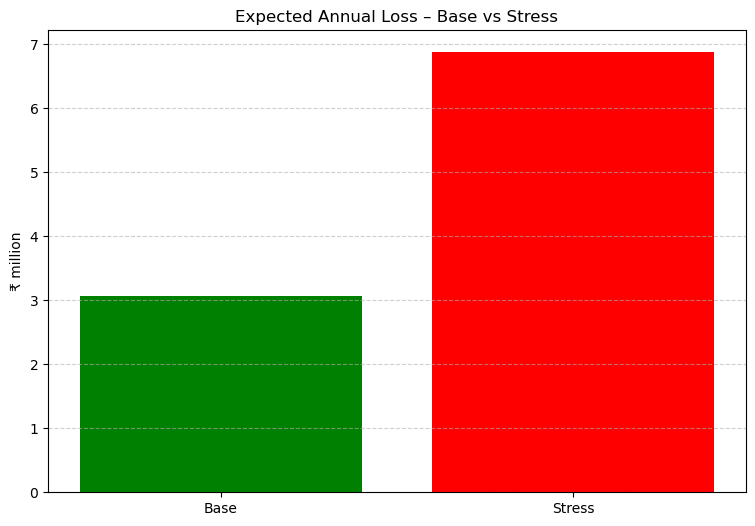

In [18]:
plt.figure(figsize=(9,6))
bars = plt.bar(['Base', 'Stress'], [expected_annual_loss, stress_eal], color=['green', 'red'])
plt.title('Expected Annual Loss – Base vs Stress')
plt.ylabel('₹ million')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
